# Importing Essential Dependencies


In [0]:
import pickle 
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reading the processed Dataset

In [6]:
pickle_in = open("/content/drive/My Drive/collab notebooks/classification_dataset", "rb")
df = pickle.load(pickle_in)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,Labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
497996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
497998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Statistical Analysis of Data

In [0]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,Labels
count,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,...,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,4.980000e+05,498000.000000,498000.000000
mean,3.172393e-07,0.000047,3.240005e-07,0.000048,2.740759e-07,0.000049,2.682736e-07,0.000047,2.772789e-07,0.000048,2.793068e-07,0.000047,2.951802e-07,0.000053,2.904258e-07,0.000046,3.135852e-07,0.000051,2.701595e-07,0.000045,2.441287e-07,0.000039,3.764478e-07,0.000060,2.353480e-07,0.000042,2.660395e-07,0.000039,3.411086e-07,0.000054,2.661568e-07,0.000042,3.974195e-07,0.000052,3.849076e-07,0.000063,3.277046e-07,0.000057,3.461153e-07,0.000058,...,0.000038,3.934514e-07,0.000066,2.163211e-07,0.000033,3.477886e-07,0.000053,2.779705e-07,0.000042,2.926423e-07,0.000048,2.741328e-07,0.000046,3.117145e-07,0.000046,2.914768e-07,0.000047,2.983759e-07,0.000045,2.624273e-07,0.000045,3.312270e-07,0.000056,3.122746e-07,0.000056,3.278515e-07,0.000047,2.949338e-07,0.000047,3.101727e-07,0.000048,3.586594e-07,0.000058,2.569359e-07,0.000038,2.691044e-07,0.000036,3.351134e-07,0.000055,0.500000
std,2.815919e-05,0.006347,2.971953e-05,0.005253,2.674947e-05,0.005550,2.643073e-05,0.005498,2.695372e-05,0.005219,2.779708e-05,0.005346,2.791646e-05,0.005538,2.760764e-05,0.005688,2.911689e-05,0.006109,2.676235e-05,0.005241,2.519751e-05,0.004499,3.211735e-05,0.005826,2.439767e-05,0.004766,2.712411e-05,0.004536,3.182260e-05,0.005701,2.648782e-05,0.004743,3.436362e-05,0.006191,3.374111e-05,0.006671,2.915238e-05,0.005646,3.022172e-05,0.006266,...,0.006182,3.261929e-05,0.006267,2.361544e-05,0.004312,3.096300e-05,0.006391,2.753990e-05,0.004949,2.819765e-05,0.006036,2.776595e-05,0.005184,2.816293e-05,0.005558,2.970115e-05,0.005079,2.828416e-05,0.005762,2.587840e-05,0.005031,2.981872e-05,0.005704,2.841203e-05,0.006372,3.093569e-05,0.005221,2.810185e-05,0.004985,2.867229e-05,0.005065,3.115682e-05,0.005736,2.583244e-05,0.005191,2.610457e-05,0.005893,2.973725e-05,0.005602,0.500001
min,0.000000e+00,-1.665795,0.000000e+00,-0.120434,0.000000e+00,-0.111332,0.000000e+00,-0.098150,0.000000e+00,-0.134556,0.000000e+00,-0.569586,0.000000e+00,-0.103239,0.000000e+00,-1.646052,0.000000e+00,-1.571077,0.000000e+00,-0.038047,0.000000e+00,-0.021688,0.000000e+00,-0.061204,0.000000e+00,-0.018548,0.000000e+00,-0.063928,0.000000e+00,-0.168987,0.000000e+00,-0.018548,0.000000e+00,-1.644329,0.000000e+00,-1.636323,0.000000e+00,-0.018548,0.000000e+00,-1.575643,...,-1.590379,0.000000e+00,-0.051688,0.000000e+00,-0.054557,0.000000e+00,-1.590988,0.000000e+00,-0.609865,0.000000e+00,-1.549217,0.000000e+00,-0.081338,0.000000e+00,-1.615385,0.000000e+00,-0.018548,0.000000e+00,-1.614633,0.000000e+00,-0.258875,0.000000e+00,-0.018548,0.000000e+00,-1.304346,0.000000e+00,-0.091679,0.000000e+00,-0.018548,0.000000e+00,-0.052892,

# Splitting the data into training and testing sets

In [0]:
x = df.iloc[:, :2048]
y = df.iloc[:, 2048]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

# Model Architecture and Training

In [9]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import normalize
from tensorflow.keras import backend as k
k.clear_session()

model = Sequential() #Using Sequential model 

model.add(Flatten()) #Input layer of the neural network
model.add(Dense(32, activation = 'relu',kernel_initializer = 'he_uniform')) #layer of 32 neurons
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu',kernel_initializer = 'he_uniform')) #Another layer of 328 neurons
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'glorot_uniform')) #Last layer or output layer

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) 
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('classifier.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history=model.fit(x_train.values, y_train.values, epochs=600, callbacks=[es,mc], batch_size=32, verbose = 1, validation_split=0.1 )

Train on 403380 samples, validate on 44820 samples
Epoch 1/600
403104/403380 [============================>.] - ETA: 0s - loss: 0.6639 - acc: 0.6045
Epoch 00001: val_acc improved from -inf to 0.63351, saving model to classifier.hdf5
403380/403380 [==============================] - 73s 181us/sample - loss: 0.6639 - acc: 0.6045 - val_loss: 0.6448 - val_acc: 0.6335
Epoch 2/600
403136/403380 [============================>.] - ETA: 0s - loss: 0.6514 - acc: 0.6256
Epoch 00002: val_acc improved from 0.63351 to 0.64360, saving model to classifier.hdf5
403380/403380 [==============================] - 73s 180us/sample - loss: 0.6515 - acc: 0.6255 - val_loss: 0.6393 - val_acc: 0.6436
Epoch 3/600
403360/403380 [============================>.] - ETA: 0s - loss: 0.6454 - acc: 0.6331
Epoch 00003: val_acc improved from 0.64360 to 0.65172, saving model to classifier.hdf5
403380/403380 [==============================] - 72s 179us/sample - loss: 0.6454 - acc: 0.6331 - val_loss: 0.6320 - val_acc: 0.6517
E

# Diagnostic plots

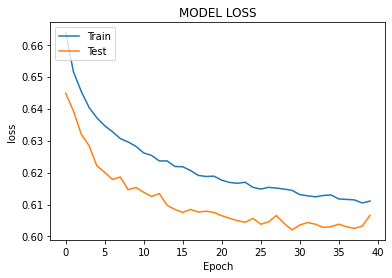

In [10]:
plt.plot(history.history['loss'], label = 'Train')
plt.plot(history.history['val_loss'], label = 'Test')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title("MODEL LOSS")
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show() 

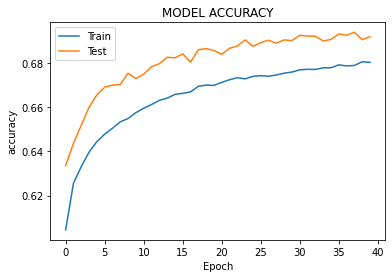

In [11]:
plt.plot(history.history['acc'], label = 'Train')
plt.plot(history.history['val_acc'], label = 'Test')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.title("MODEL ACCURACY")
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

# Model Validation

In [12]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [13]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[16902  7949]
 [ 7390 17559]]


In [14]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print("Accuracy Percentage: ", score*100)

Accuracy Percentage:  69.1987951807229
